# 1. Getting Started with SiReNetA and Overview

Authors: **Gorka Zamora-López** and **Matthieu Gilson**

---------------------

This notebook is part of an introductory tutorial for the use of *Stimulus-Response Network Analysis* ([SiReNetA](https://github.com/mb-BCA/SiReNetA)) to study the structure of complex networks:
1. **[Getting Started and Overview](1_GettingStarted.ipynb)**
2. *[Calculating Response to Stimulus and Metrics](2_Basics_StimRespMetrics.ipynb)*
3. *[Canonical Models](3_Basics_CanonModels.ipynb)*
4. *[Comparing Networks](4_UseCase_CompareNets.ipynb)*
5. *[Network Distance](5_UseCase_NetDist.ipynb)*
6. *[Weighted Networks](6_Basics_WeightedNets.ipynb)* 

---------------------

### Outline
* Installation of the *SiReNetA* library.
* Familiarization with the library and getting information.
* A first example into Stimulus-Response Network Analysis.

---------------------

## 1. Installing *SiReNetA* and dependencies

*SiReNetA* is built upon the array object definition of [NumPy](https://numpy.org) and it uses functions from the [SciPy](https://scipy.org) library. Running these tutorials also requires [Matplotlib](https://matplotlib.org) for plotting and visualization purposes. The installation of *SiReNetA* checks for these libraries and installs them if not available, see the file 'requirements.txt' [here](https://github.com/mb-BCA/SiReNetA/blob/master/requirements.txt).

Some notebooks also require the library [GAlib](https://github.com/gorkazl/pyGAlib) for graph generation, manipulation and analysis in the context of classic graph theory.

The following cell checks whether *SiReNetA* is already installed (in the same Python environment in which this notebook is running) and otherwise, the library will be installed using [pip](https://pypi.org/project/pip/). 

>**Note**: the exclamation mark ( ! ) before `pip install ...` indicates the Jupyter notebook to run the line of code as a system command, same as if we would run it from a terminal window.

In [4]:
# Check SiReNetA is installed in the current Python environment, otherwise install (NOTE that you can also create a dedicated python environment to install SiReNetA)
try:
    import sireneta
except ImportError:
    # Install from the GitHub repository
    print('Installing SiReNetA from GitHub ...')
    ! pip install git+https://github.com/mb-BCA/SiReNetA.git@master

# Make sure the library is properly installed by importing it
import sireneta as sna
print( 'SiReNetA:', sna.__version__ )

SiReNetA: 1.0.0.dev1


<br>

## 2. Getting familiarised with the *SiReNetA* library

Information about the library, its modules and functions is obtained 'online' as usual in the IPython and Jupyter environments. Type `help(module_name)` or `module_name?` in a cell of the notebook (or in an interactive window) to access the corresponding docstrings.

Run the following cell to see the general overview of *SiReNetA*.

In [5]:
# See the general description of sireneta library 
sna?

As shown, the library is organised into four user modules:

- responses.py
- metrics.py
- simulate.py
- tools.py

Run the following cell (uncommenting lines one-by-one) to see the description and a list of functions accessible in each module.

In [7]:
## Explore the help functions of SiReNetA

sna.responses?
#sna.metrics?
#sna.simulate?
#sna.tools?

Finally, check the description of individual functions, the expected parameters and their outputs. For example:

In [12]:
sna.responses.TransitionMatrix?
#sna.responses.Resp_DiscreteCascade?
#sna.responses.Resp_LeakyCascade?
#sna.metrics.GlobalResponse?
#sna.metrics.TimeToPeak?
#sna.simulate.Sim_RandomWalk?


<br>

## 3. A first example of Stimulus-Response Network Analysis (SRNA)

The core idea behind *SRNA* is to reveal the properties of networks by probing how they respond to localised perturbations. That is, to apply a stimulus of unit amplitude at one node and then observe how the rest of nodes respond over time. The manner in which the stimulus propagates throughout the network depends both on the structure of the network and the dynamical propagation model selected. Network metrics are then extracted out of the pair-wise, node-wise or global responses, depending on whether nodes are stimulated individually or jointly.

Under *SRNA* the study of a network consists of four steps:

1. Identify the key constraints of the real system investigated.
2. Choose a canonical propagation propagation model.
3. Compute the pair-wise network responses $\mathcal{R}_{ij}(t)$ of the network.
4. Extract spatio-temporal network metrics out of $\mathcal{R}_{ij}(t)$.


For illustration, we will load the small graph (binary and undirected) depicted below and visualise the network response at various levels for the leaky (continuous) cascade propagation model. For this model, the time to peak provides an approximation for the geodesic distance [Zamora-López and Gilson, Chaos (2024)](https://doi.org/10.1063/5.0202241).

<img alt="Sample Graph, n=8 nodes" src="img/TestNet_N8.jpg" width="180">


In [13]:
# Python standard / third-party library imports

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
# Some plotting options to control visualization
%matplotlib inline
# Define the default scale for the plots
plt.rcParams['figure.dpi'] = 72

We consider the network determined by the following binary matrix.

In [36]:
# Load a small network (binary or unweighted)
net = np.loadtxt('../Data/Testnet_N8.txt', dtype=int)
N = len(net)


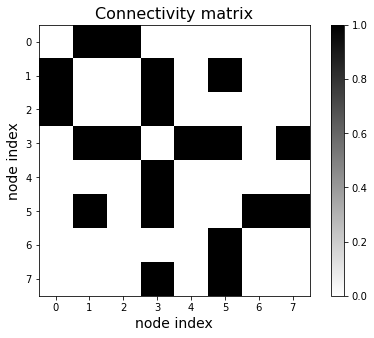

In [37]:
plt.figure()
plt.title('Connectivity matrix', fontsize=16)
plt.imshow(net, cmap='gray_r')
plt.clim(0,net.max())
plt.colorbar()
plt.xlabel('node index', fontsize=14)
plt.ylabel('node index', fontsize=14)
plt.tight_layout()
plt.show()

Now choosing a propagation model

In [20]:
# Check the spectral radius and the largest time constant for the leaky cascade propagation model
evs = np.linalg.eigvals(net)
evsnorms = np.zeros(N, float)
for i in range(N):
    evsnorms[i] = np.linalg.norm(evs[i])
evmax = evsnorms.max()
taumax = 1.0/evmax

print( 'Spectral radius:\t%2.5f' %evmax )
print( 'Largest possible tau:\t%2.5f' %taumax )

Spectral radius:	3.03407
Largest possible tau:	0.32959


In [21]:
# Set a leakage time-constant
tau = 0.8 * taumax

# Define the temporal resolution for the "simulation"
tfinal = 10
dt = 0.01
tpoints = np.arange(0.0, tfinal+dt, dt)
nsteps = len(tpoints)

# Calculate the pair-wise responses for a time span between 0 and tmax
resps_lc = sna.Resp_LeakyCascade(net, S0=1.0, tau=tau, tmax=tfinal, timestep=dt) 

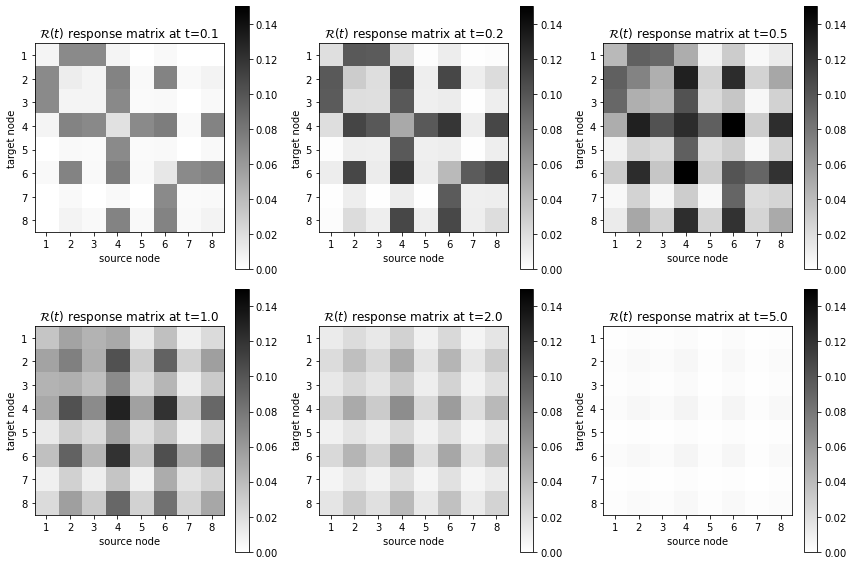

In [22]:
# Visualise the pair-wise response matrices at times t = 0.1, 0.3, 0.5, 1.0, 2.0, 3.0
maxresp = resps_lc.max()

tidxlist = [10,20,50,100,200,500]
plt.figure(figsize=[12,8])
for i, tidx in enumerate(tidxlist):
    t = tpoints[tidx]
    plt.subplot(2,3,i+1)
    plt.title('$\mathcal{R}(t)$ response matrix at t=%1.1f' %t)
    plt.imshow(resps_lc[tidx], cmap='gray_r')
    plt.clim(0,maxresp)
    plt.colorbar()
    plt.xticks(np.arange(N), np.arange(N)+1)
    plt.yticks(np.arange(N), np.arange(N)+1)
    plt.xlabel('source node')
    plt.ylabel('target node')
plt.tight_layout()

Above the matrices correspond to the response for pairs of source/target nodes at several times. The curves below represent the responses to a stimulation at node 1, for all nodes (including 1). Another representatoion is given below, where each row has been summed and teh resulting value plotted across time: this corresponds to the response felt by each node following the joint stimulation of all nodes.

In comparison, the black dashed curve represents the global network response rescaled by the number of weights. This shows how specific nodes differ from global response, being larger or smaller.

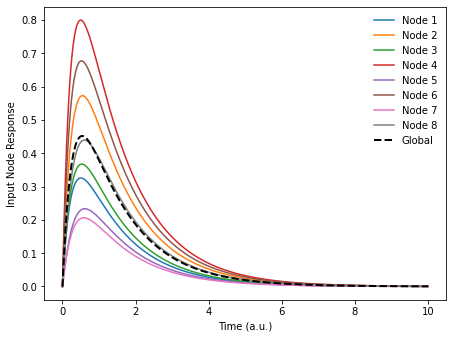

In [24]:
# Compute and visualise the node responses
inresp, outresp = sna.NodeResponses(resps_lc)
glbresp = sna.GlobalResponse(resps_lc)

plt.figure()
for i in range(N):
    plt.plot(tpoints, inresp[:,i], label='Node %d' %(i+1))
plt.plot(tpoints, glbresp / N, label='Global', c='k', ls='--', lw=2)
plt.xlabel('Time (a.u.)')
plt.ylabel('Input Node Response')
plt.legend(frameon=False)
plt.tight_layout()

We can try to explain these curves, for example by checking whether the degree of the node has an influence on the response cumulated over time, which corresponds to the area under the curve.

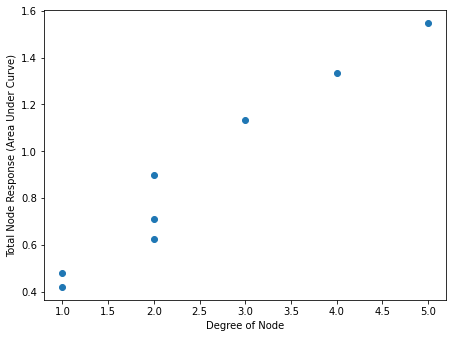

In [25]:
# Compare the node response with the degree
deg = net.sum(axis=0)

noderesp = sna.AreaUnderCurve(inresp, timestep=dt)

plt.figure()
plt.plot(deg,noderesp, 'o')
plt.xlabel('Degree of Node')
plt.ylabel('Total Node Response (Area Under Curve)')
plt.tight_layout()

Now going into the detail of the response to the stimulation of a single node, we can plot the curve corresponding to each matrix element. Below is an exemple for all matrix elements corresponding to the column for source being node 1.

Again, we plot as a reference the output node response for node 1 that corresponds to the sum of the response felt by all nodes when stimulating node 1. Here it becomes clearer that some pathways from node 1 to some other nodes are faster or slower than the black dashed reference. This illustrates that the spatio-temporal properties of the response capture the network topological structure.

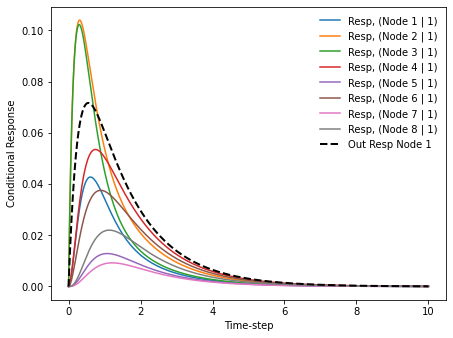

In [26]:
# Visualise temporal responses of nodes i = 2, 3, ... , 8 to stimulus in j = 1

plt.figure()
for i in range(N):
    plt.plot(tpoints, resps_lc[:,0,i], label='Resp, (Node %d | 1)' %(i+1) )
plt.plot(tpoints, outresp[:,1] / N, label='Out Resp Node 1', c='k', ls='--', lw=2)
plt.xlabel('Time-step')
plt.ylabel('Conditional Response')
plt.legend(frameon=False)
plt.tight_layout()

Following, we can extract the time to peak for each pair of source/target nodes, which we compare to the geodesic distance calculated on the binary graph.

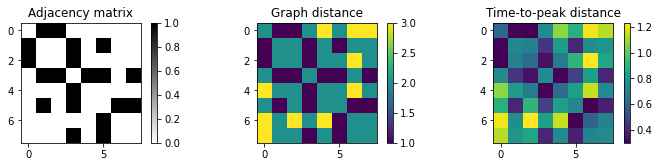

In [27]:
# Compute the classical graph distance
import galib
dij = galib.FloydWarshall(net)

# Compute the time-to-peak distance
ttpdist = sna.Time2Peak(resps_lc, timestep=dt)

plt.figure(figsize=(10,2.4))
# Plot the adjacency matrix
plt.subplot(1,3,1)
plt.title('Adjacency matrix')
plt.imshow(net, cmap='gray_r')
plt.colorbar()

# Plot the classical graph distance
plt.subplot(1,3,2)
plt.title('Graph distance')
plt.imshow(dij)
plt.colorbar()

# Plot the time-2-peak distance matrix
plt.subplot(1,3,3)
plt.title('Time-to-peak distance')
plt.imshow(ttpdist)
plt.colorbar()

plt.tight_layout()